## detect the edges of an image using OpenCV 
## -Sobel edge detection method

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


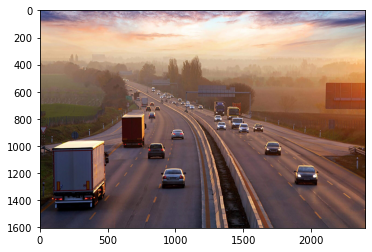

In [36]:
# Python program to  Edge detection
# using OpenCV in Python
# using Sobel edge detection
# and laplacian method

img=cv2.imread("road.jpg")
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Calculation of Sobelx
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    
# Calculation of Sobely
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
# Calculation of Laplacian
laplacian = cv2.Laplacian(image,cv2.CV_64F)
     
plt.imshow(image)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


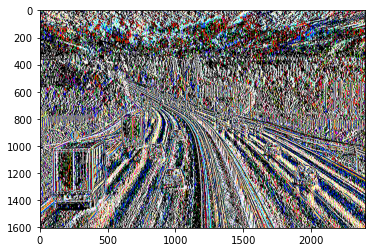

In [37]:
plt.imshow(sobelx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


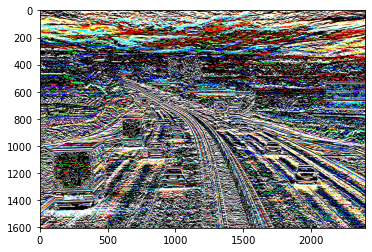

In [38]:
plt.imshow(sobely)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


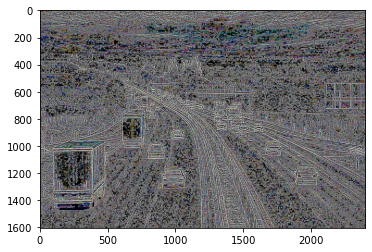

In [39]:

plt.imshow(laplacian)

## -Canny edge detection method


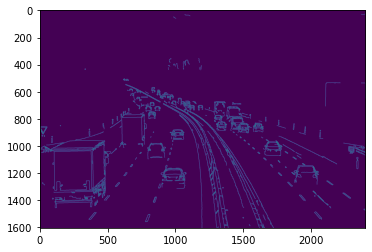

In [40]:
img=cv2.imread("road.jpg") 

# define range of red color in HSV
lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# create a red HSV colour boundary and 
# threshold HSV image
mask = cv2.inRange(image, lower_red, upper_red)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image,image, mask= mask)
  
# Display an original image
plt.imshow(image)
  
# finds edges in the input image image and
# marks them in the output map edges
edges = cv2.Canny(image,100,200)
  
# Display edges in a frame
plt.imshow(edges)
  
    

## Alternate simpler method for directly extracting points:

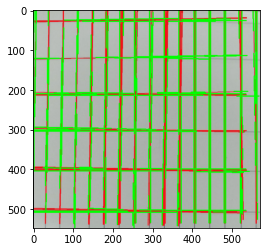

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Read image
image = cv2.imread('image.png')
 
# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
 
# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)
 
# Apply HoughLinesP method to
# to directly obtain line end points
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )
lines_list=[]
# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
     
# Save the result image
cv2.imwrite('detectedLines.png',image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))